In [1]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression



In [2]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('../../Dataset/VCB-Historical-Data_Group-9.csv', index_col='Date', parse_dates=True)

# Tiền xử lí dữ liệu


In [3]:
# 3. Chuyển các giá trị trong cột về number
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,47765.0,46844.0,47765.0,46690.0,910430,0.0281
2019-03-04,48226.0,47765.0,48379.0,47765.0,1720000,0.0097
2019-03-05,48379.0,48226.0,48994.0,47995.0,2009999,0.0032
2019-03-06,48149.0,48456.0,48610.0,47535.0,1380000,-0.0048
2019-03-07,48456.0,48149.0,48994.0,48072.0,2420000,0.0064
...,...,...,...,...,...,...
2024-05-27,90200.0,90400.0,90600.0,89700.0,1060000,0.0000
2024-05-28,90700.0,89800.0,90700.0,89800.0,1350000,0.0055
2024-05-29,89800.0,90800.0,91000.0,89800.0,1190000,-0.0099


In [4]:
# 4. Loại các giá trị null
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

In [5]:
# 5. Chia train test
df = data
df = df[['Price']]
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = len(df) - train_size 

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [6]:
# 6. Chạy auto Arima
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=12,  
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=4.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=16195.769, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=15979.320, Time=1.30 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=15769.791, Time=1.85 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=16197.334, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=4.66 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=15979.323, Time=1.31 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=12.18 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=15768.454, Time=0.99 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.54 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=4.50 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=15977.790, Time=1.24 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=7.28 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=157

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  919
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 12)   Log Likelihood               -7882.227
Date:                              Thu, 06 Jun 2024   AIC                          15768.454
Time:                                      16:08:31   BIC                          15778.072
Sample:                                           0   HQIC                         15772.127
                                              - 919                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.8632      0.013    -64.680      0.000      -0.889      -0.837
sigma2      1.908e+06   3.83e+04     49.865      0.000    1.83e+06    1.98e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):              4952.49
Prob(Q):                              0.51   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -1.51
Prob(H) (two-sided):                  0.76   Kurtosis:                        14.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# 7. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [9]:
# 8. Dự đoán 30 ngày tiếp theo
last_index_30 =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index_30, stop=last_index_30+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index_30+1, last_index_30+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
919    60607.839315
920    61043.958375
921    60784.188819
922    60772.009419
923    60611.361597
924    60942.498329
925    60902.608896
926    60633.148812
927    60250.073189
928    60208.891465
929    59828.114389
930    59764.540724
931    59745.380039
932    60181.499099
933    59921.729542
934    59909.550143
935    59748.902321
936    60080.039053
937    60040.149620
938    59770.689536
939    59387.613913
940    59346.432189
941    58965.655113
942    58902.081447
943    58882.920763
944    59319.039823
945    59059.270266
946    59047.090867
947    58886.443045
948    59217.579777
dtype: float64


In [10]:
# 9. Dự đoán 60 ngày tiếp theo
last_index_60 =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index_60, stop=last_index_60+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index_60+1, last_index_60+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
919    60607.839315
920    61043.958375
921    60784.188819
922    60772.009419
923    60611.361597
924    60942.498329
925    60902.608896
926    60633.148812
927    60250.073189
928    60208.891465
929    59828.114389
930    59764.540724
931    59745.380039
932    60181.499099
933    59921.729542
934    59909.550143
935    59748.902321
936    60080.039053
937    60040.149620
938    59770.689536
939    59387.613913
940    59346.432189
941    58965.655113
942    58902.081447
943    58882.920763
944    59319.039823
945    59059.270266
946    59047.090867
947    58886.443045
948    59217.579777
949    59177.690344
950    58908.230259
951    58525.154637
952    58483.972913
953    58103.195837
954    58039.622171
955    58020.461487
956    58456.580546
957    58196.810990
958    58184.631591
959    58023.983768
960    58355.120501
961    58315.231068
962    58045.770983
963    57662.695361
964    57621.513636
965    57240.736561
966    57177.

In [11]:
# 10. Dự đoán 90 ngày tiếp theo
last_index_90 =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index_90, stop=last_index_90+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index_90+1, last_index_90+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
919     60607.839315
920     61043.958375
921     60784.188819
922     60772.009419
923     60611.361597
            ...     
1004    55006.743441
1005    54746.973885
1006    54734.794485
1007    54574.146663
1008    54905.283395
Length: 90, dtype: float64


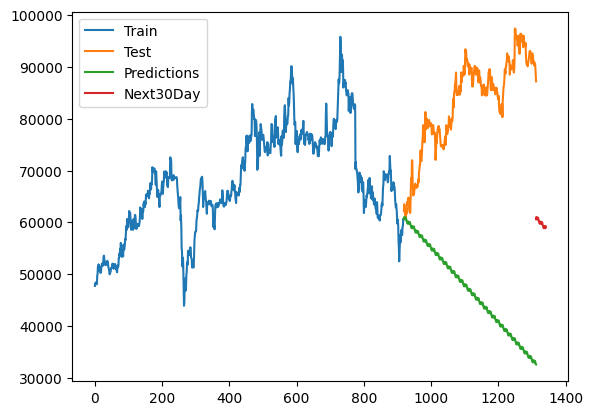

In [12]:
#11. Vẽ đồ thị các giá trị từ train tới test và dự đoán 30 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

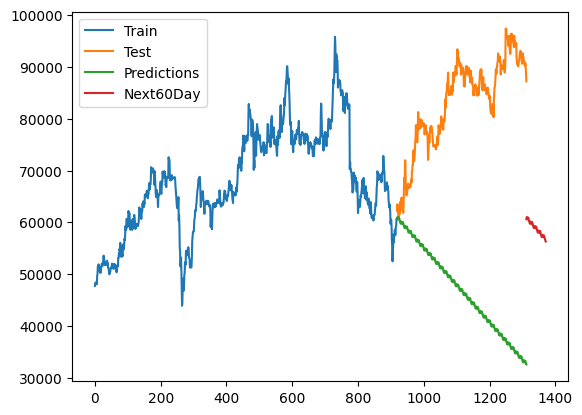

In [13]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 60 ngày sau

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

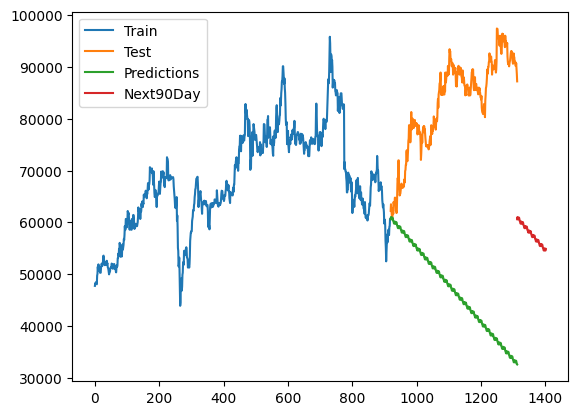

In [14]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 90 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

In [15]:
#13. Đánh giá mô hình

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Tính toán RMSE, MAPE và MAE cho tập test
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 39861.86376701303
Testing MAPE: 41.98208136099581
Testing MAE: 36312.41251964137
